In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Exercise 2  

Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n. 

In [99]:
from scipy import stats

def compute_se(L=0.5,n=10,simulations=1000):
    errors = []
    for i in range(simulations):
        sample = np.random.exponential(L,size=n)
        x_bar = np.mean(sample)
        errors.append((x_bar-L)**2)
    return np.sqrt(sum(errors)/simulations)

In [100]:
# standard error (using MSE)
compute_se()

0.15566159514598193

In [148]:
# confidence interval

def compute_ci(L=0.5,n=10,simulations=1000):
    means = []
    for i in range(simulations):
        sample = np.random.exponential(L,size=n)
        x_bar = np.mean(sample)
        means.append(x_bar)
    return (np.percentile(means,5), np.percentile(means,95))
    
compute_ci()

(0.27533122670103405, 0.7879663443730625)

In [78]:
errors = []
x_range = range(0,1000,10)
for n in x_range:
    mse = compute_se(L=0.5,n=n,simulations=1000)
    errors.append(mse)

/Users/drewhibbard/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/drewhibbard/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Mean Squared Error of Sample Mean')

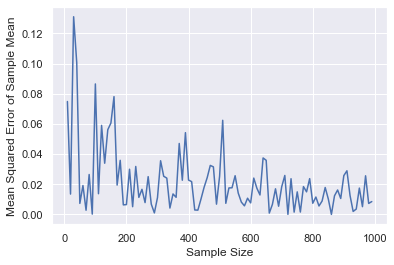

In [65]:
plt.plot(x_range,errors)
plt.xlabel('Sample Size')
plt.ylabel('Mean Squared Error of Sample Mean')

Exercise 3  

In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, lam, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of lam, then computes their mean error and RMSE.

Is this way of making an estimate biased? Plot the sampling distribution of the estimates and the 90% confidence interval. What is the standard error? What happens to sampling error for increasing values of lam? 

In [172]:
def simulate_game(lam):
    goals = 0
    t = 0
    while t <= 1:
        time_between_goals = np.random.exponential(scale=1/lam,size=1)
        t += time_between_goals
        goals +=1
    return goals

In [173]:
def run_simulations(lam=2,m=10000):
    errors = []
    goals = []
    abs_errors = []
    for i in range(m):
        L = simulate_game(lam)
        goals.append(L)
        errors.append((L-lam)**2)
        abs_errors.append(L-lam)
    plt.hist(goals)
    plt.xlabel('Goals Scored')
    plt.ylabel('Number of Games')
    return ('RMSE: ',np.sqrt(sum(errors)/m), '\n Mean Error: ', np.mean(abs_errors))

('RMSE: ', 1.7296531444194236, '\n Mean Error: ', 0.9931)

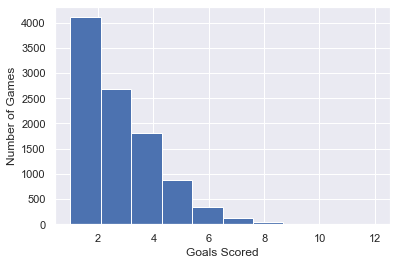

In [174]:
# RMSE of goals scored per game with each sim being compared to given lambda
run_simulations()

In my function, the estimator appears to be biased with a mean error of about 1 goal no matter how many simulations I run.  This differs from the author, whose mean error converges on zero as m increases.  I'm not sure what I'm doing wrong.